In [9]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')



In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer


model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer


model.add(Conv2D(100,(3,3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

## add more layer
model.add(Flatten())


model.add(Dropout(0.5))


model.add(Dense(50,activation='relu'))


model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 200)    │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 98, 98, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 100)    │       180,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 47, 47, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │     2,645,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,827,252 (10.79 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6768 - loss: 0.5906 - val_accuracy: 0.7848 - val_loss: 0.4476
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8127 - loss: 0.4394 - val_accuracy: 0.8520 - val_loss: 0.2983
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8727 - loss: 0.3069 - val_accuracy: 0.8969 - val_loss: 0.2509
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9229 - loss: 0.1983 - val_accuracy: 0.9283 - val_loss: 0.1734
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9630 - loss: 0.1389 - val_accuracy: 0.9417 - val_loss: 0.1603
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9480 - loss: 0.1241 - val_accuracy: 0.9058 - val_loss: 0.2313
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9548 - loss: 0.1058 - val_accuracy: 0.9283 - val_loss: 0.2033
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9743 - loss: 0.0662 - val_accuracy: 0.9327 - val_loss:

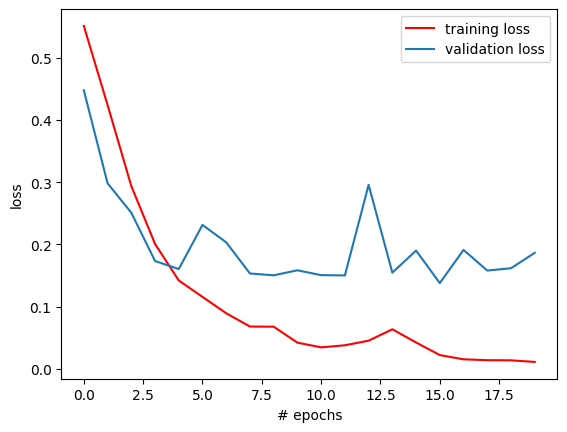

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [17]:
print(model.evaluate(test_data,test_target))

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.9152 - loss: 0.2767
[0.3149617314338684, 0.9244604110717773]
